# IMDb Movie Review Sentiment Analysis

In [2]:
## Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re    ## Used in pattern matching
import nltk
from nltk.corpus import stopwords   ## for stopwords removal
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer  ## for stemming and lemmatization

In [3]:
data = pd.read_csv('Imdb - data_imdb.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.isnull().sum()  ## Checks for missing values

review       0
sentiment    0
dtype: int64

In [6]:
data['sentiment'].value_counts()  ## Counting the number of positive and negative reviews

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Feature Engineering | Plotting Necessary Visuals

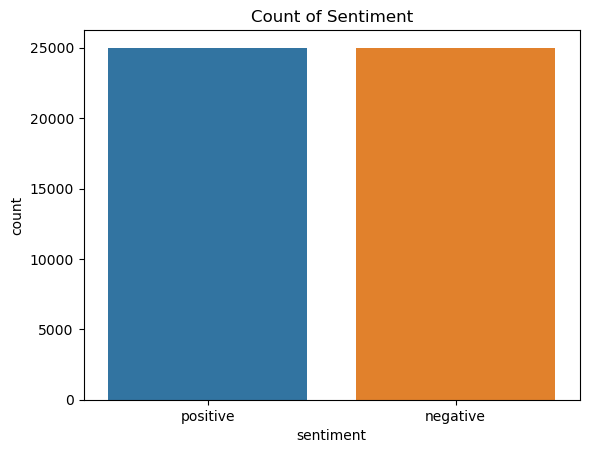

In [7]:
##-- Visualising the count of sentiments --##
sns.countplot(data=data,x='sentiment',hue='sentiment')
plt.title('Count of Sentiment')
plt.show()

**Equal counts of positive and negative sentiments**

### Preprocessing

In [9]:
stop_words = set(stopwords.words('english'))   # set of all english stop words

def clean_text(text):   ## function to clean the text
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z']"," ", text)  ## Allows values from A-Z               
    text = re.sub(r'\s+', ' ', text).strip() ## Removes white space(if any)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]  ## list of all texts cleaned
    return ' '.join(filtered_tokens)
    

In [10]:
data['preprocessed_reviews'] = data['review'].apply(clean_text) ## function applied to clean the texts

**Word Count**

In [11]:
from collections import Counter  ## Counts the frequency of each word
def count(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    word_counts = Counter(tokens) ## Count words in each line
    return word_counts

data['count'] = data['preprocessed_reviews'].apply(count) ## Applying count function

In [14]:
data[['count']].head(5)

count
0  {'one': 1, 'reviewers': 1, 'mentioned': 1, 'wa...
1  {'wonderful': 1, 'little': 2, 'production': 2,...
2  {'thought': 2, 'wonderful': 1, 'way': 1, 'spen...
3  {'basically': 1, ''s': 2, 'family': 1, 'little...
4  {'petter': 1, 'mattei': 4, ''s': 3, 'love': 1,...

In [5]:
data[['preprocessed_reviews']].tail(25)

preprocessed_reviews
49975  minutes mindy mindy tease boyfriend bill mindy...
49976  saw movie theater release watched vhs tape yea...
49977  dog bite dog n't going everyone really enjoyed...
49978  halloween one movies gets skin deep opinion sc...
49979  saw high expectations come akshay kumar govind...
49980  stunning film high quality br br apparently ba...
49981  repeat please see movie review warning sets re...
49982  hones used like show watch regularly thank god...
49983  loved fan original series always wondered back...
49984  hello derrick cannon welcome first ever cannon...
49985  imaginary heroes clearly best film year comple...
49986  movie disgrace major league franchise live min...
49987  remake alejandro amenabar 's abre los ojos tim...
49988  first tuned morning news thought wow finally e...
49989  got one weeks ago love 's modern light filled ...
49990  lame lame lame minute cringe fest 's minutes l...
49991  les visiteurs first movie medieval time travel...
49992  john garfield plays marine blinded grenade fig...
49993  robert colomb two full time jobs 's known thro...
49994  typical junk comedy br br almost laughs genuin...
49995  thought movie right good job n't creative orig...
49996  bad plot bad dialogue bad acting idiotic direc...
49997  catholic taught parochial elementary schools n...
49998  'm going disagree previous comment side maltin...
49999  one expects star trek movies high art fans exp...

### Stemming and Lemmatization

In [8]:
stemmer = PorterStemmer()  ## for stemming the texts

##-- Function for stemming --##
def stem_text(text):    
    text=str(text)
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens] ## list of all stemmed texts
    return ' '.join(stemmed_tokens)

In [12]:
data['preprocessed_reviews_stemmed'] = data['preprocessed_reviews'].apply(stem_text) 

In [42]:
lemmatizer = WordNetLemmatizer() ## for lemmatization of texts
##-- Function for lemmatizing --##
def lemmatized_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] ## lsit of all lemmatized texts
    return ' '.join(lemmatized_tokens)

In [45]:
data['preprocessed_reviews_lemmatized'] = data['preprocessed_reviews'].apply(lemmatized_text)

### Model Training and Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer  ## for Bag of Words and TF-IDF

In [14]:
##-- Frequency of each word to find important words --##
bow_vectorize = CountVectorizer()
X_bow = bow_vectorize.fit_transform(data['preprocessed_reviews_stemmed'])
print("\nBag of Words (Word count)")
print(X_bow[5].toarray())
print(f"The list of features of bow matrix are \n{bow_vectorize.get_feature_names_out().tolist()[:20]}")


Bag of Words (Word count)
[[0 0 0 ... 0 0 0]]
The list of features of bow matrix are 
['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaargh', 'aaaaaaah', 'aaaaaaahhhhhhggg', 'aaaaagh', 'aaaaah', 'aaaaahhhh', 'aaaaargh', 'aaaaarrrrrrgggggghhhhhh', 'aaaaatch', 'aaaaaw', 'aaaahhhhhh', 'aaaahhhhhhh', 'aaaand', 'aaaarrgh', 'aaaawwwwww', 'aaaggghhhhhhh', 'aaagh']


In [102]:
from sklearn.model_selection import train_test_split ## splitting the data
X = data['preprocessed_reviews_stemmed'] ## Passing the stemmed review column
y = data['sentiment'] ## Output or Target column.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

**Used stemming to feed in the model instead of lemmatization, as in sentiment analysis same words are generally repeated to show positive or negative sentiments**

In [103]:
tfid_vectorize = TfidfVectorizer(min_df=5,max_df=0.9,stop_words='english',
                                 token_pattern=r'\b[a-zA-Z]{3,15}\b') ## matches pattern, if missed during preprocessing

X_train_tfidf = tfid_vectorize.fit_transform(X_train)
X_test_tfidf = tfid_vectorize.transform(X_test)
print(f"The list of features of Tf-IDF matrix are \n{tfid_vectorize.get_feature_names_out().
tolist()[21:45]}") ## important features according to TF-IDF score. 

The list of features of Tf-IDF matrix are 
['abel', 'aberr', 'abet', 'abhay', 'abhishek', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abit', 'abject', 'abl', 'abli', 'abnorm', 'abo', 'aboard', 'abod', 'abolish', 'abomin', 'aborigin', 'abort', 'abound', 'abr']


## Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ## Metrics to evaluate model performance

In [18]:
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
lr_y_pred_tfidf = lr.predict(X_test_tfidf)

LogisticRegression()

### Evaluating Model Performance

In [24]:
lr_accuracy = accuracy_score(y_test,lr_y_pred_tfidf)
lr_classification = classification_report(y_test,lr_y_pred_tfidf)
print(f"The accuracy of my model is {lr_accuracy*100:.2f}%")
print("\nThe Classification report of Logistic Regression Model")
print(lr_classification)

The accuracy of my model is 88.82%

The Classification report of Logistic Regression Model
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      6157
    positive       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



**Model is able to give 89% accuracy.**

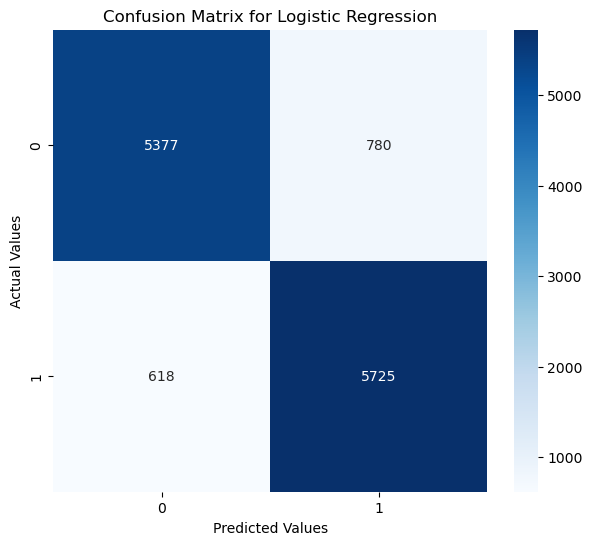

In [62]:
##-- Confusion Matrix for Logistic regression --##
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test,lr_y_pred_tfidf),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Support Vector Machine

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel ='linear',random_state = 42) ##  Linear kernel, as the data is linearly seperable 
svc.fit(X_train_tfidf,y_train)

SVC(kernel='linear', random_state=42)

In [22]:
svc_y_pred_tfidf = svc.predict(X_test_tfidf)

### Evaluating Model Performance

In [37]:
svc_accuracy = accuracy_score(y_test,svc_y_pred_tfidf)
svc_classification = classification_report(y_test,svc_y_pred_tfidf)
print(f"The accuracy of my model is {svc_accuracy*100:.2f}%")
print("\nThe Classification report of SVM Model")
print(svc_classification)

The accuracy of my model is 88.89%

The Classification report of SVM Model
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      6157
    positive       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



**Model is able to give 89% accuracy**

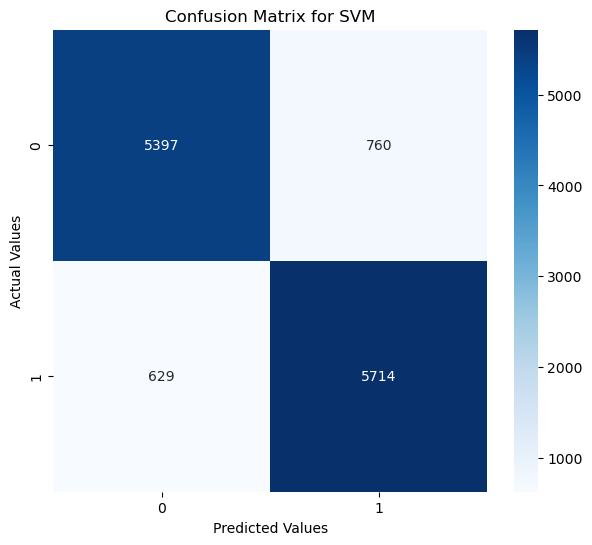

In [63]:
##-- Confusion Matrix for Support Vector Machine --##
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test,svc_y_pred_tfidf),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Long Short Term Memory(LSTM) | DL Model

In [70]:
from sklearn.preprocessing import LabelEncoder  ## convert categorical column to respective numerical value.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences ## sequencing the input length
from tensorflow.keras.models import Sequential  ## Intacting layer one-after another
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout 

In [68]:
##-- Converts reviews and labels into arrays --## 
reviews = data['preprocessed_reviews_stemmed'].astype(str).values
labels = data['sentiment'].values

In [72]:
le = LabelEncoder()
labels = le.fit_transform(labels) ## convert all categories to numerical labels

In [74]:
max_words = 1000  ## maximum unique words taken
max_len = 100 ## length of each token in each sequence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_len, 
                                 padding='post', truncating='post') ## sequences the input so the model doesn't handle imbalance input arrays

### Model Training and Evaluation

In [93]:
X_train,X_test,y_train,y_test = train_test_split(padded_sequences, labels, 
                                                 test_size=0.2, random_state=42) ## splitting 

In [94]:
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'), ## relu keeps the output between -1 and +1
    Dropout(0.3),
    Dense(1, activation='sigmoid')]) # sigmoid to convert output to binary

model.compile(loss='binary_crossentropy', ## binary classification
              optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\rajay\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
history = model.fit(
    X_train, y_train,
    epochs=5,  ## Number of times model observe the data during training
    batch_size=64, ## size of each batch
    validation_split=0.2,  ## 20% splitting for validation checks
    verbose=1)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 114s 217ms/step - accuracy: 0.5577 - loss: 0.6808 - val_accuracy: 0.5156 - val_loss: 0.6916
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 117s 235ms/step - accuracy: 0.5291 - loss: 0.6909 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 203ms/step - accuracy: 0.6447 - loss: 0.6120 - val_accuracy: 0.7981 - val_loss: 0.4406
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 201ms/step - accuracy: 0.8204 - loss: 0.4103 - val_accuracy: 0.8305 - val_loss: 0.3736
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 199ms/step - accuracy: 0.8376 - loss: 0.3726 - val_accuracy: 0.8321 - val_loss: 0.3687


In [96]:
lstm_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


### Evaluating Model Performance

In [97]:
lstm_pred = (lstm_pred > 0.5).astype(int)  ## converts prediction back to 0 and 1
lstm_accuracy = accuracy_score(y_test,lstm_pred)
lstm_classification = classification_report(y_test,lstm_pred,target_names=['Negative', 'Positive'])
print(f"The Accuracy of LSTM model is {lstm_accuracy*100:.2f}%")
print("\nThe Classification Report of LSTM model")
print(lstm_classification)

The Accuracy of LSTM model is 83.78%

The Classification Report of LSTM model
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      4961
    Positive       0.85      0.82      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



**LSTM was able to predict 84% accurate classification**

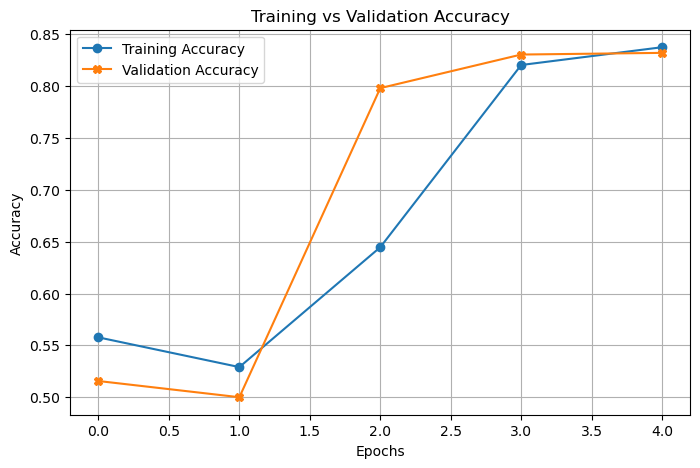

In [98]:
##-- Plotting training accuracy vs validation accuracy --##
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy',marker="o")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker="X")
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

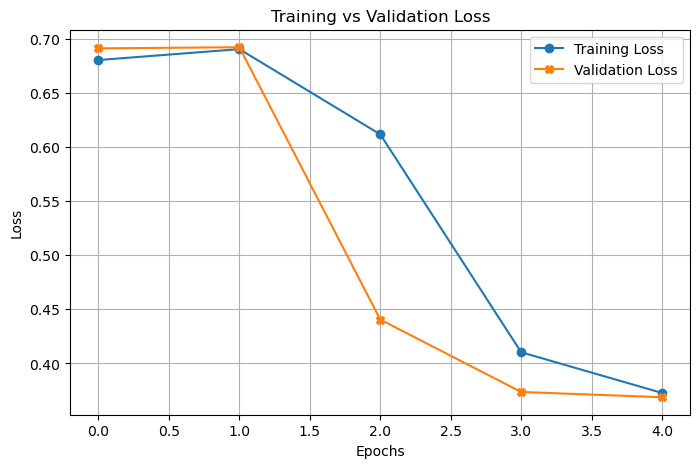

In [99]:
##-- Plotting training loss vs validation loss --##
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss',marker = "o")
plt.plot(history.history['val_loss'], label='Validation Loss',marker = "X")
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### LR Model Tuning

In [49]:
from sklearn.model_selection import GridSearchCV  ## for hyper-parameter tuning

In [53]:
lf_grid = {'C' : [1,2,1.0],
           'class_weight':['balanced',None]} ## grid that will be used in tuning
lf_grid_search = GridSearchCV(LogisticRegression(),lf_grid,
                              cv=5,scoring='accuracy',n_jobs=1)  
lf_grid_search.fit(X_train_tfidf,y_train)
lf_grid_search_best_score = lf_grid_search.best_score_ ## best score after tuning
lf_grid_search_best_params = lf_grid_search.best_params_ ## best parameters according to the model

In [57]:
print(round(lf_grid_search_best_score*100,2))

88.73


**After tuning model gave 88.73% accuracy**

## Model consumption

In [44]:
##- Function to take preprocess user inputs --##
def predict_sentiment(new_reviews):
    new_reviews = str(new_reviews).lower()
    new_reviews = re.sub(r"[^a-zA-Z']"," ", new_reviews)               
    new_reviews = re.sub(r'\s+', ' ', new_reviews).strip()
    preprocessed_reviews =[' '.join([word for word in word_tokenize(new_reviews) if word not in stop_words])] ## remove stopwords and tokenize
    reviews_tfidf = tfid_vectorize.transform(preprocessed_reviews) ## vectorize the preprocessed inputs
    predictions = svc.predict(reviews_tfidf) ## predict according to SVC model
    return predictions[0] ## returns first prediction

In [45]:
print("Please enter a review to classify sentiment (type 'exit' to stop)\n")

while True:
    user_input = input("Enter the review:")  ## take the user input

    if user_input.lower() == 'exit':  ## if user clicks exit the loop will end
        print("Exiting program") 
        
        break
    else:
        predicted_sentiment = predict_sentiment(user_input) ## predict the sentiment

        print(f"Review: {user_input} \nPredicted Sentiment: {predicted_sentiment}")
 

Please enter a review to classify sentiment (type 'exit' to stop)



Enter the review: nice


Review: nice 
Predicted Sentiment: positive


Enter the review: I went to watch the movie and it was awesome !!!


Review: I went to watch the movie and it was awesome !!! 
Predicted Sentiment: negative


Enter the review: The movie was good!!!


Review: The movie was good!!! 
Predicted Sentiment: positive


Enter the review: Exit


Exiting program


## **Final Report and Conclusion**

1. The dataset is **balanced**, containing **25,000 positive** and **25,000 negative** movie reviews.  

2. Comprehensive **text preprocessing** was performed, including:
   - Regular expression–based cleaning  
   - Stopword removal  
   - Stemming  
   - Lemmatization  

3. **Stemming** was preferred over lemmatization, as sentiment analysis tasks benefit more from **root word forms** than grammatical base forms.  

4. For text vectorization, both **Bag of Words (BoW)** and **TF-IDF** representations were evaluated.  

5. The **TF-IDF** features were ultimately chosen to train the models, as they provided **richer and more discriminative representations** than BoW.  

6. Among traditional machine learning models, **Logistic Regression** and **Support Vector Machine (SVM)** achieved strong results, with an accuracy of **approximately 89%**.  

7. For deep learning, an **LSTM (Long Short-Term Memory)** network was implemented to capture **sequential dependencies** within the text data.  

8. The **LSTM model** achieved an accuracy of **83.79% after 5 epochs**, demonstrating good generalization despite its simple architecture.  

9. The trained models are capable of **accepting new user reviews** and **predicting sentiment (positive or negative)** effectively.  

---

### Overall Insights

- **Logistic Regression** and **SVM** slightly outperform the baseline LSTM model when trained on TF-IDF features, due to their effectiveness on high-dimensional sparse data.  
- The **LSTM model** shows strong potential for improvement with:
  - Additional training epochs  
  - Pretrained embeddings (e.g., **Word2Vec**)  

- The complete pipeline successfully integrates **data preprocessing**, **feature extraction**, **model training**, and **prediction**, making it a **robust and reusable sentiment analysis framework**.

---


## Video Link
https://drive.google.com/file/d/19hxFQrCbaCkCSo6uO9DQPRfTDC6jomqH/view?usp=sharing